# Census Income Project


### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    1.	A single cell estimate of the population 16+ for each state.
    2.	Controls for Hispanic Origin by age and sex.
    3.	Controls by Race, age and sex.
    
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



## Dataset Link
    

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 32560
No of Columns: 15


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Statistical Analysis

Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check

Since dataset is large,  Let check for any entry which is repeated or duplicated in dataset.

In [4]:
df.duplicated().sum() # Check if any duplicate entry or duplicate row with same value exist

24

<b> If we just check CSV File we can find that there are some missing value in dataset which shown fill with '?' 
    
Let check how many question mark (" ?") inside dataset.
</b>

In [5]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<b> replace ' ?' with np.NaN </b>

In [6]:
df=df.replace(' ?',np.NaN)

Check if any whitespace, 'NA' or '-' exist in dataset. </b>

In [7]:
df.isin([' ','NA','-']).sum().any()

False

#### Observation:
1. We need to Replace ' ?' with np.NaN
2. No whitespace, NA, '-' exist in dataset.

dropping duplicated entry from dataset before checking null values.

In [8]:
df.drop_duplicates(keep='last', inplace=True)

In [9]:
df.shape

(32536, 15)

## check for Missing values 

<AxesSubplot: >

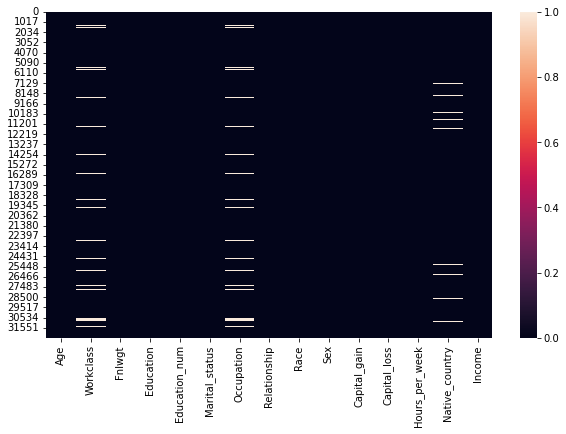

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

#### Observation:
- We have missing values in Occupation,workclass, Native country.

In [11]:
#What percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Observation:
- We have 32536 rows , 14 Independent columns and 1 Target feature.

- Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.

- Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatypes.

In [13]:
# Dividing numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

## Missing value imputation

<b> Occupation, Workclass and Native Country are categorical variable so we can imputate them with mode of that feature.</b>

In [14]:
# Imputate Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

### Missing Value Check After Imputataion

In [15]:
#Check what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


#### Observation :
No Missing Value exists.


### Statistical Matrix

<AxesSubplot: >

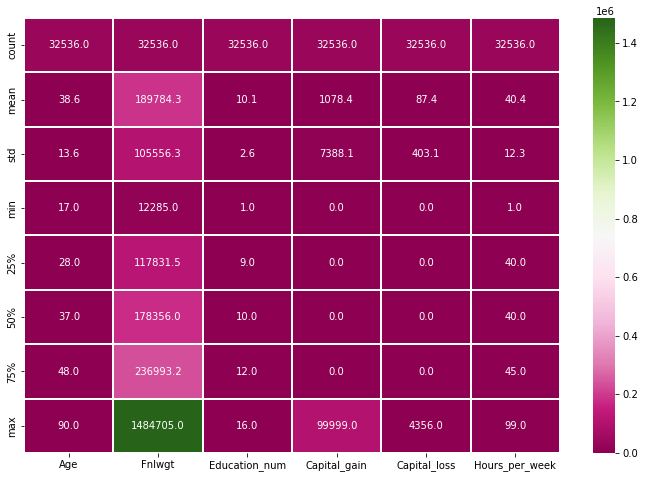

In [16]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


#### Observation:
- Minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
- Minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

### Start Exploring categorial features with Enlisting Value counts & Sub-categories 

In [18]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# EDA 

### Start EDA by analysing our target variable first.

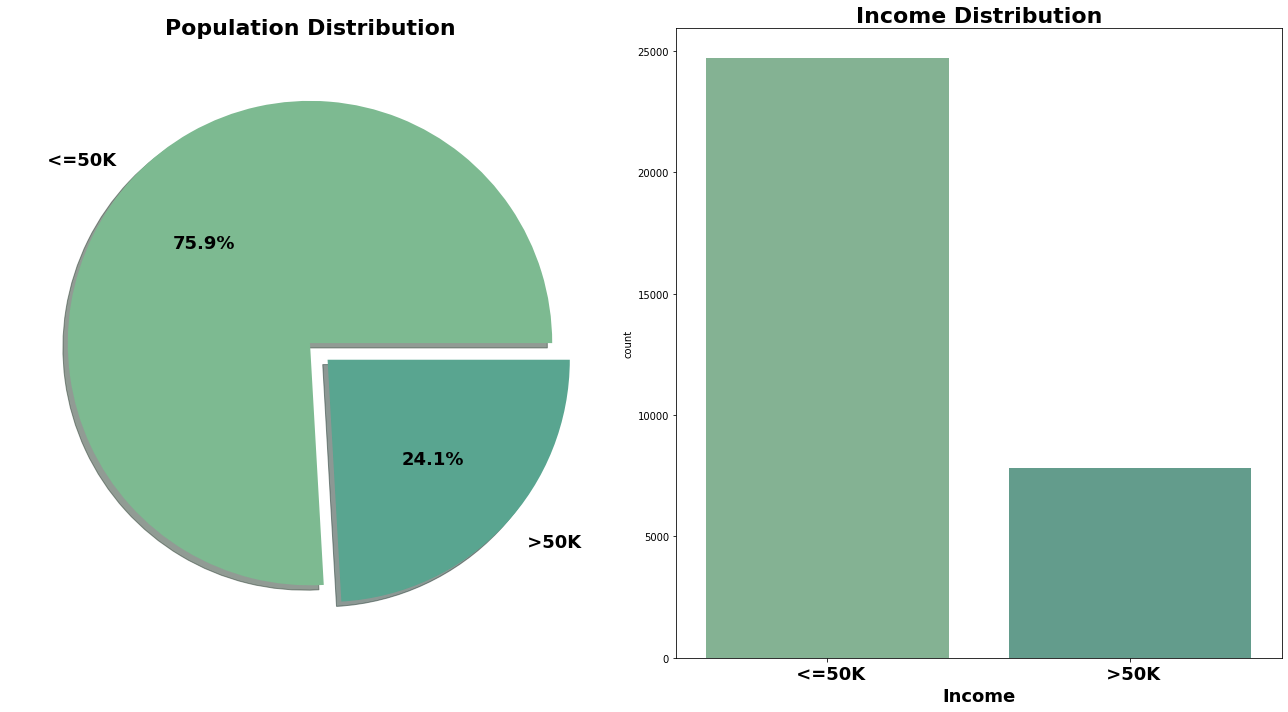

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('crest')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation :
- 75.9 % population (24697 peoples) have income less than 50K.
- Our task is to predict income and we see that target variable income is imbalanced.

<b> Let check each feature against Target variable to gain more insight into data before finding answer of important questions. </b>

### Exploration of Age

In [20]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [21]:
# Defining function to create new columns to classify people according different age gruop
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [22]:
# Calling function age_group
df['age_group']=df['Age'].apply(age_group)

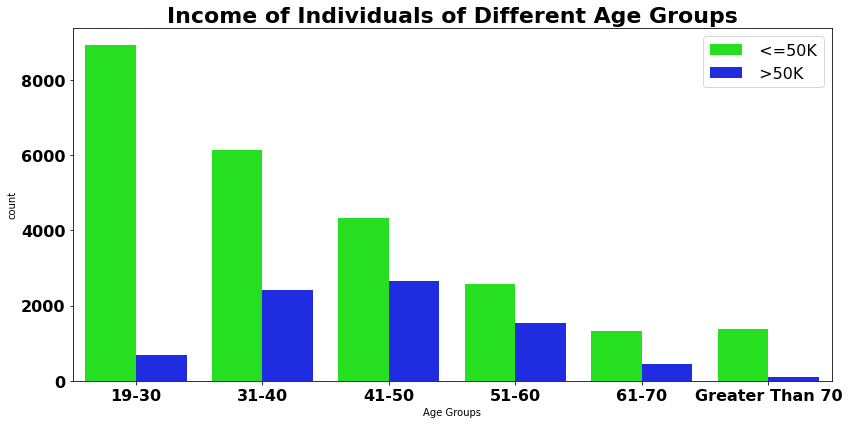

In [23]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(x=df['age_group'], hue=df['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

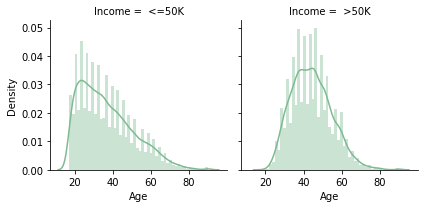

In [24]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

#### Observation:

- Almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70.
- We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60.



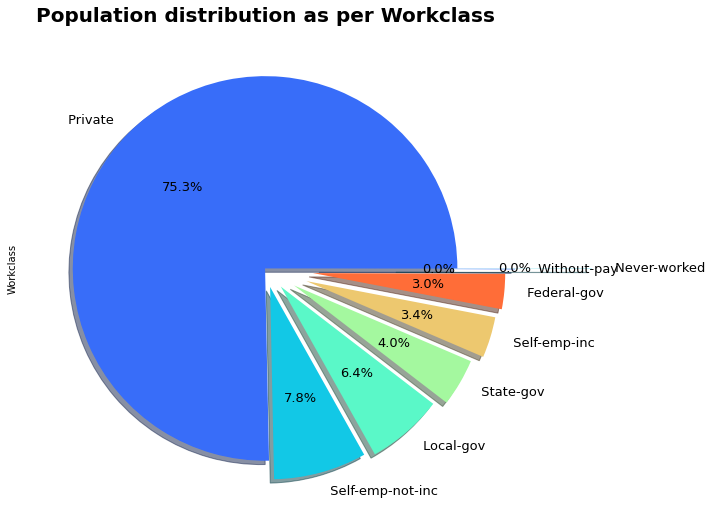

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

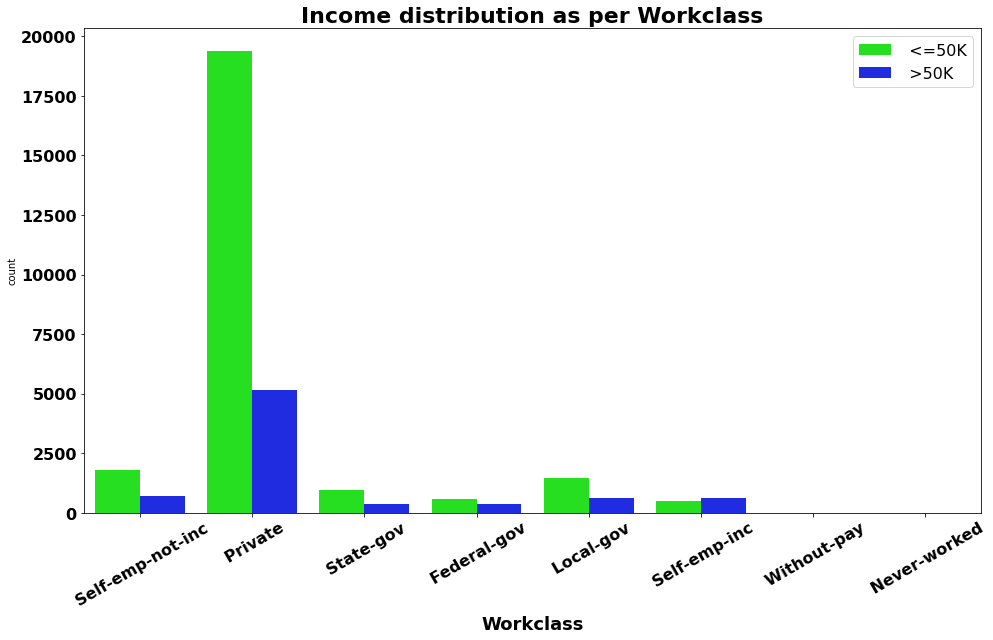

In [26]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Workclass'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [27]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


#### Observation :

- 75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %
  
- There is significant difference between private sector employees income where  less than 25 % people earn more than 50K dollars an year

-  We can see very minute difference between the number of people whose income is more or less than 50K dollars an year. Same goes with state goverment with some difference. 
    
- We have category who never worked & without pay may be unempolyed or colleges students.

- Goverment Employees have high wages compare to private 

### Education Vs Income

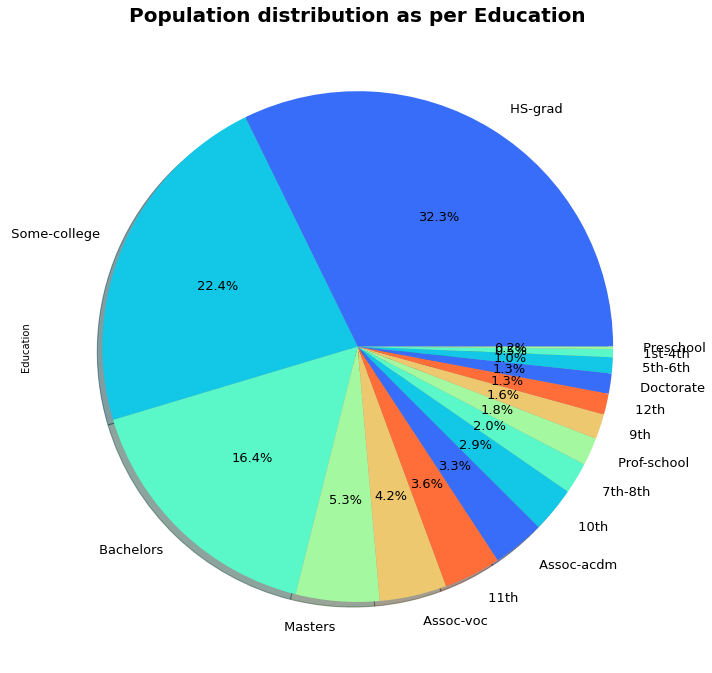

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

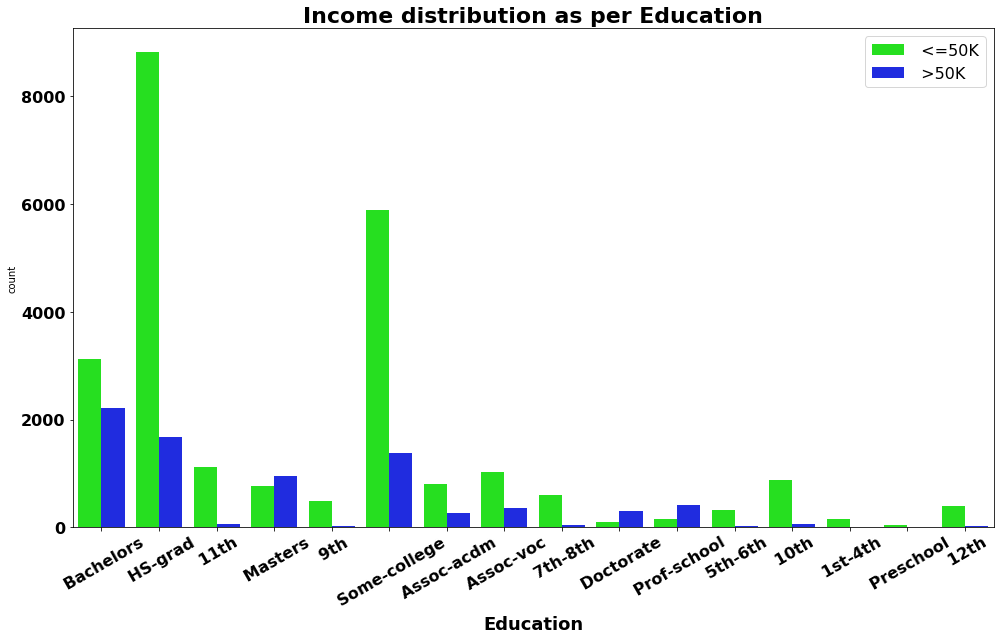

In [29]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Education'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation:
-  32.3% people with HS-Grad education which is  prevalent education level.
- 5.3 % people with masters and 1.3 % population is Doctorate degree holder. ( Highly educated & intellactual people belongs to this category.
- We have very handful people who earn > 50 K dollars having education below 12th level.
- Maximum number of people who earn > 50K dollars are Bachelors degree holder.
- Number of people earning > 50K dollars an year outnumber with the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn > 50K dollars an year!

In [30]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


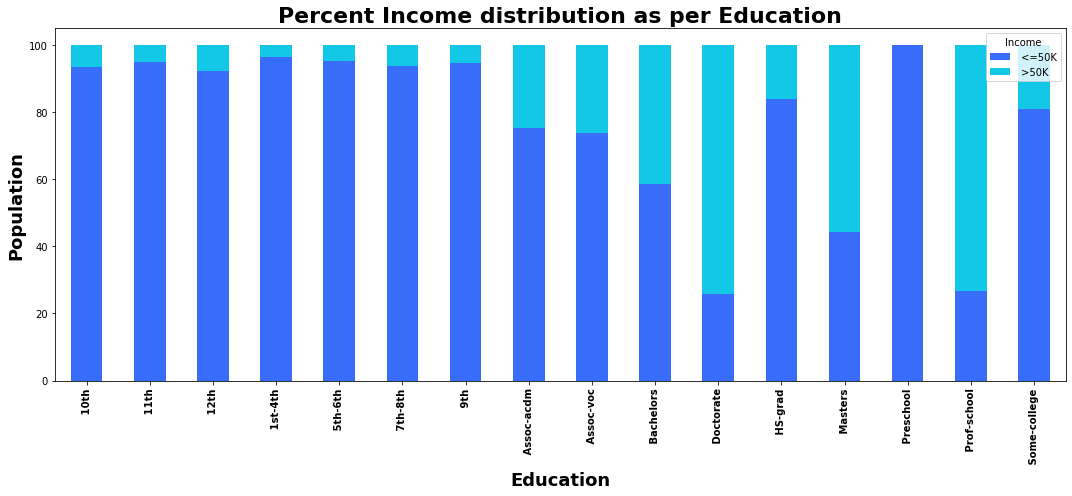

In [31]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

#### Observation:
- 75 % of Doctorate people earn > 50K dollars an yeas, followed by Prof- school.(Highly earning people most of times comes with Masters or Doctorate education background.)
- We can see that private sector is  HS-Grad with 8305 people.
- Private sector is also  highly educated people with masters, doctorate followed by local goverment.

## Impact of Marital Status on Income

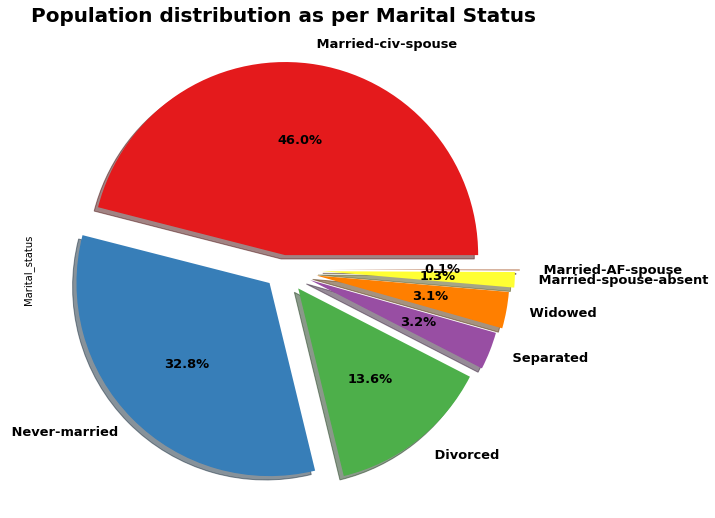

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

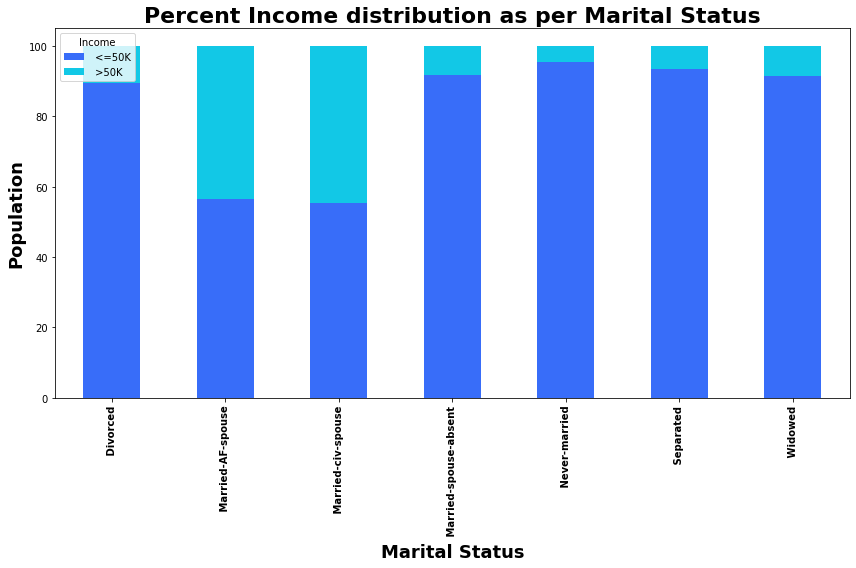

In [33]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [34]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


#### Observation :
<b> Married people are most like to earn more than 50K dollars an year.
    
Reason Might be Emotional support and stability of life than who are divorced/separated.</b>
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

 ## Occupation VS Income

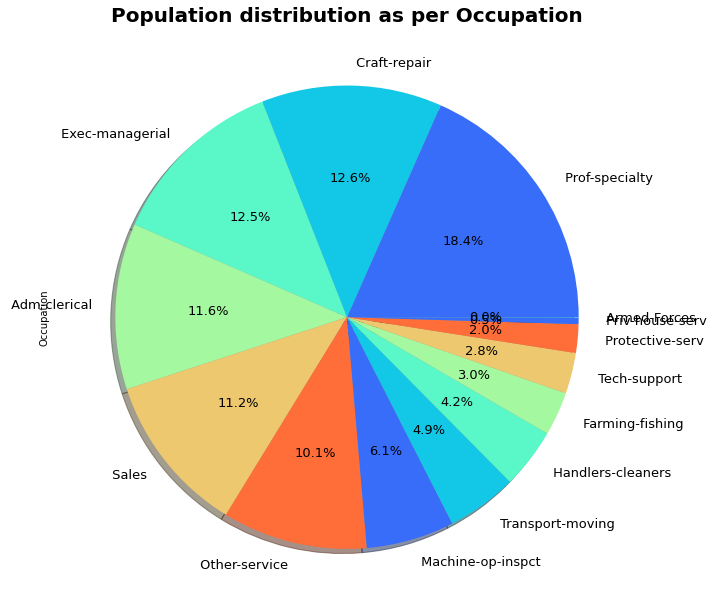

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

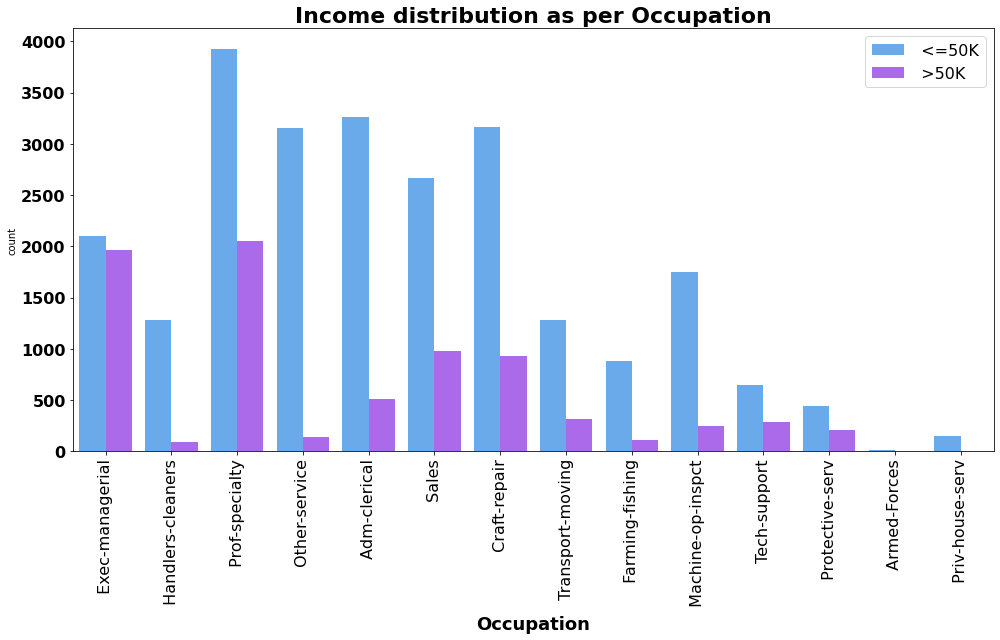

In [36]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Occupation'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation :
- Exec-managerial role are equally likely to earn more than 50K dollars an year.
- Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.


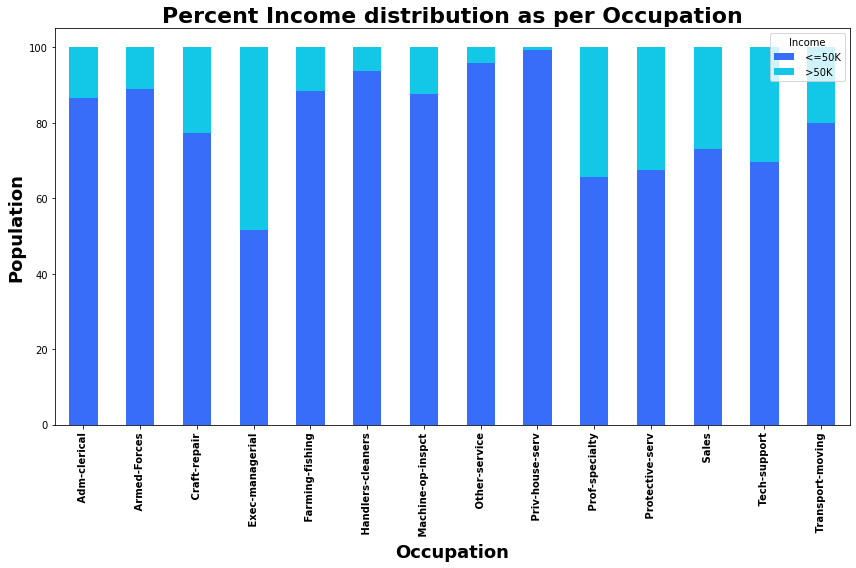

In [37]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [38]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


#### Observation :
- Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.

- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Minimum chances for Greater than 50K Club comes from Private House Service occupation> where 1/147 chance of getting more than 50K dollars an year.

 Check with different occupation fit with respect to Work class 

In [39]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='winter_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


#### Observation :
- <b> Here is another surprising element, there are 7 peoples From Never Worked Category  with High earning Profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.</b>

### Relationship VS Income

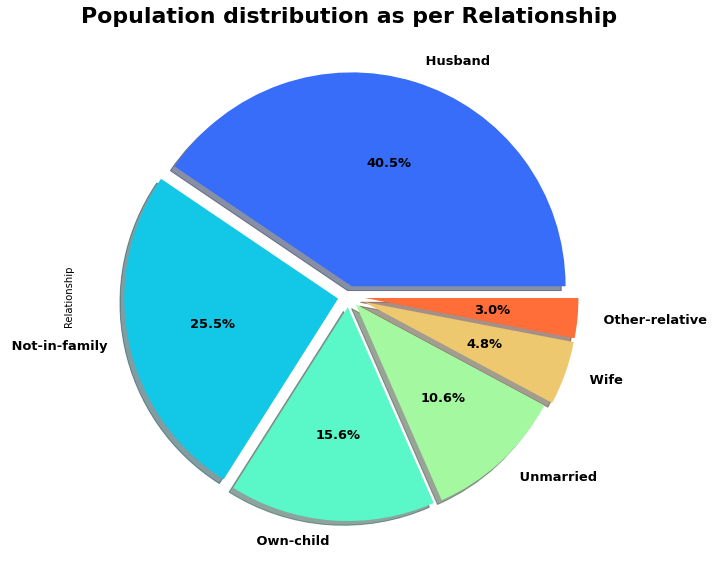

In [40]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

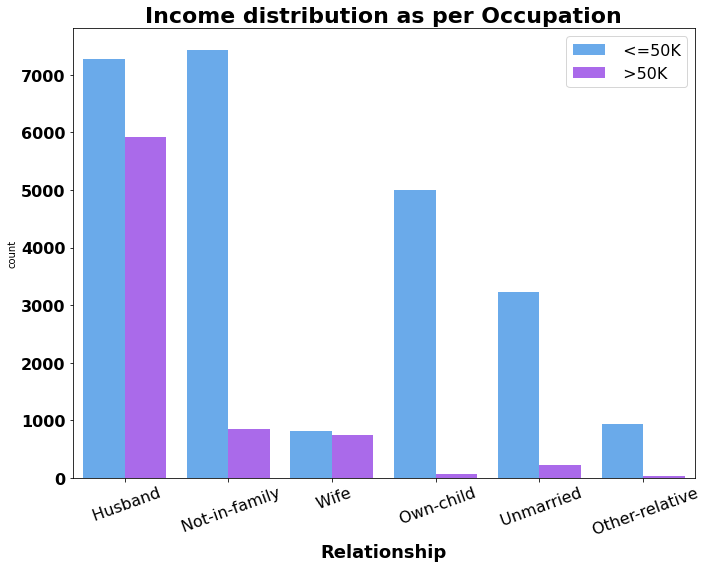

In [41]:
plt.figure(figsize=(10,8))
p = sns.countplot(x=df['Relationship'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation:
- Wife's are equally likely to earn > 50K dollars an year.
- For Husband's there is less possibility of them to earn > 50K dollars an year.
- There are just a handful of Unmarried people earning > 50K dollars an year.

### Race vs Income

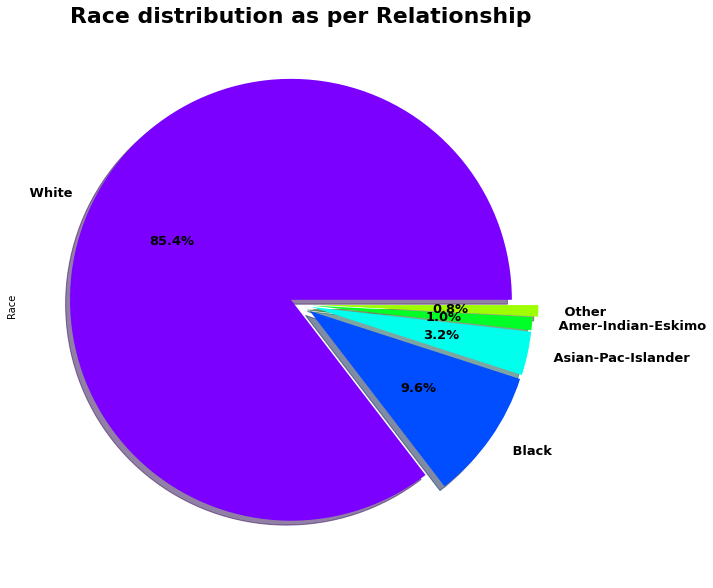

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

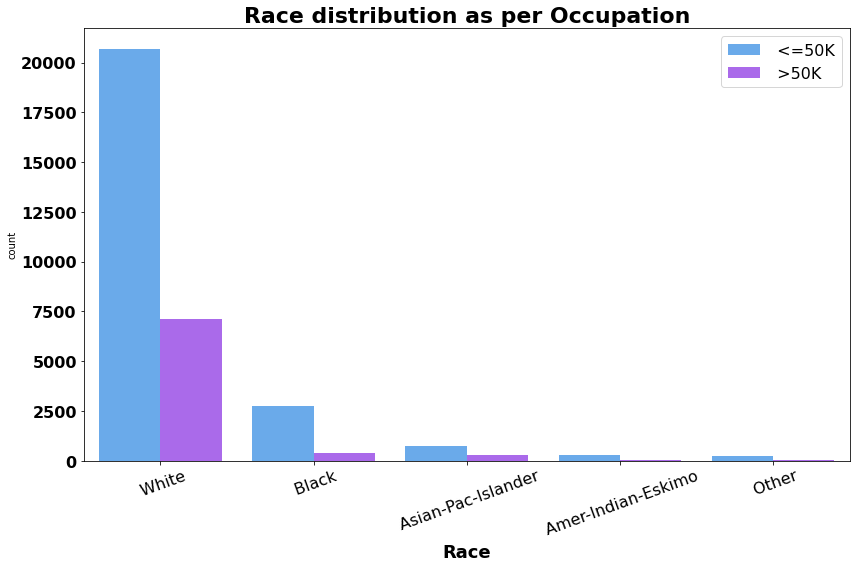

In [43]:
plt.figure(figsize=(12,8))
p = sns.countplot(x=df['Race'], hue=df['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

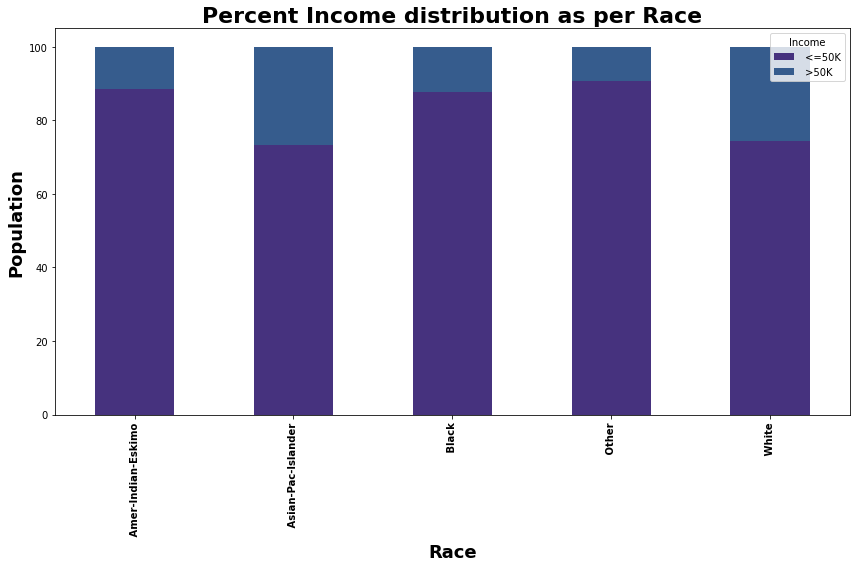

In [44]:
# Percentage Income distribution in terms of Education
sns.set_palette('viridis')
table = pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

#### Observation:
- 85.4 % peoples are whites followed by black community with 9.6%.
- Maximum people in Greater than 50K Club are White.
- This observation is biased as we have very less data of other races. No Meaningful & reliable insightscan be inferred .

### Sex Vs Income

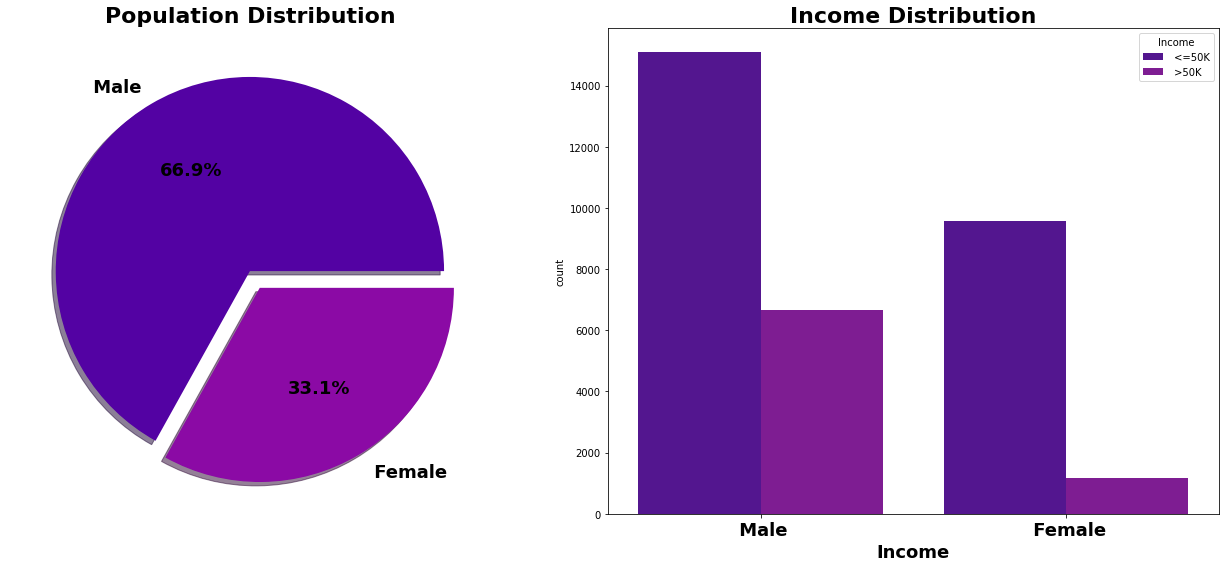

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- Significant gap between male and female earnings.
- Less than 10% Women in > 50K Dollar Club.
- Around 33% of Men earning > 50K dollars an year.



In [46]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='winter_r')

#### Observation:
- Less than 50k for most of females work in Adm-clerical,Other-service,Prof-specialty.
- 50K++ dollars Club in females  from Prof-speciality,Exec-Managerial profession.
- Maximum men work in Prof-Specialty.

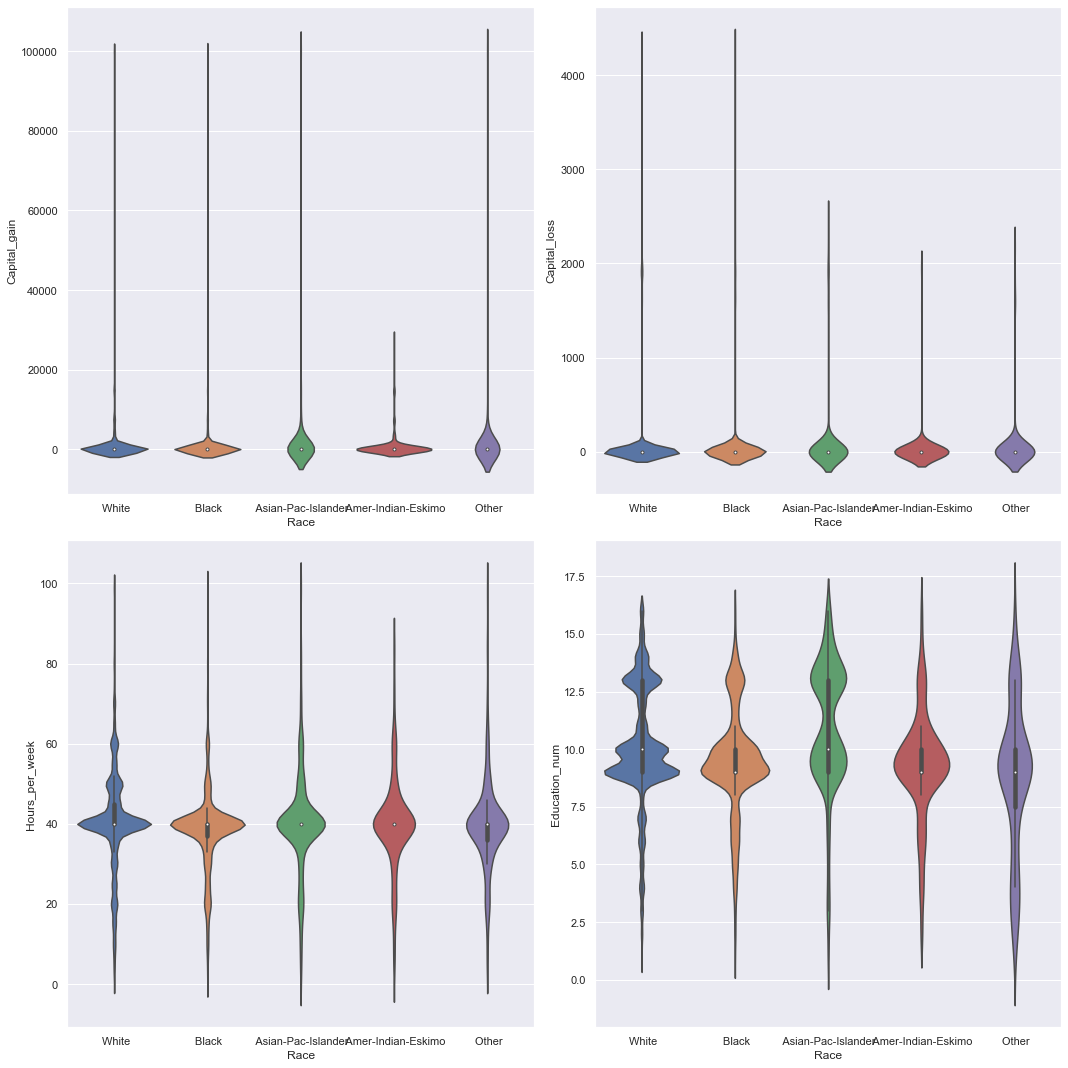

In [47]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);

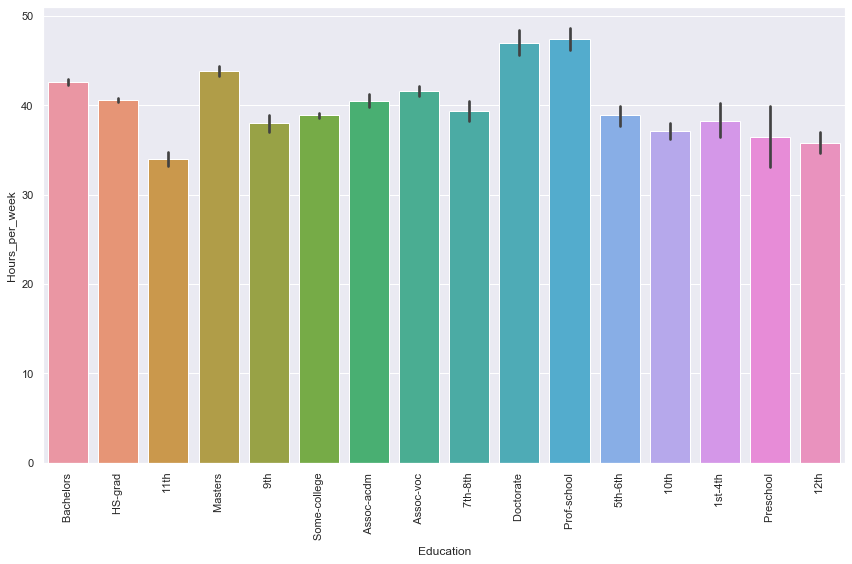

In [48]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

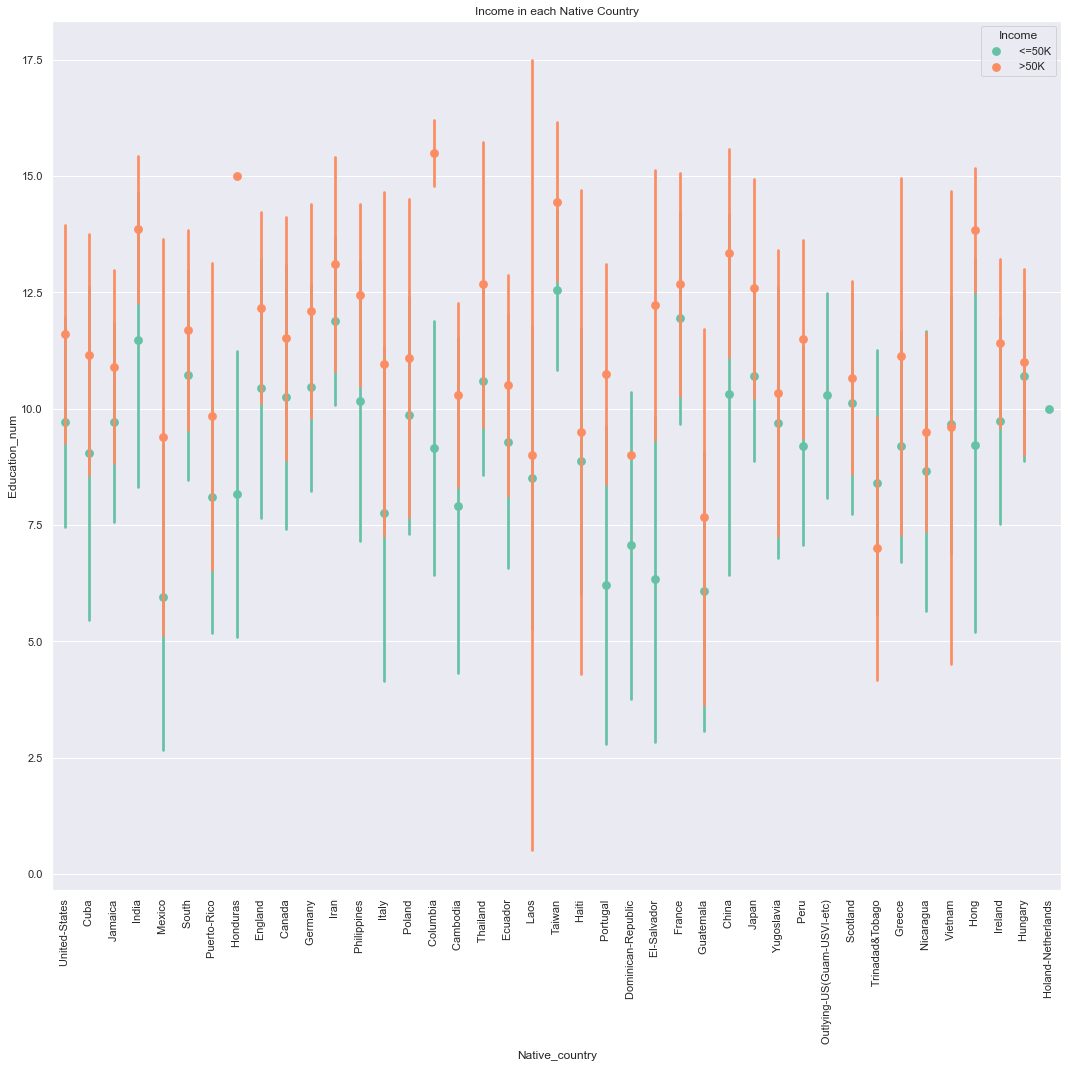

In [49]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


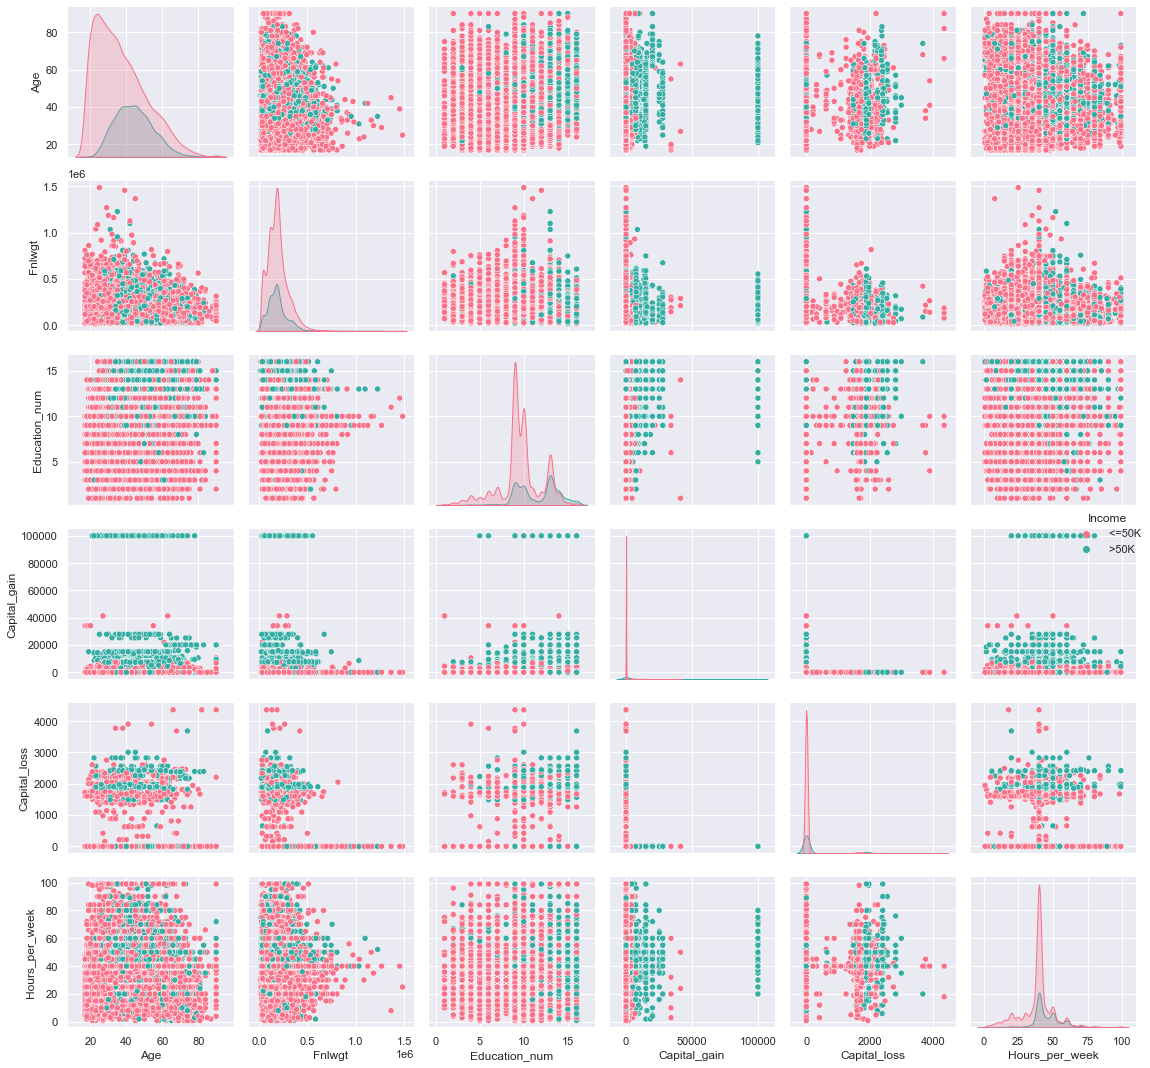

In [50]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

In [51]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


# Encoding categorical data

In [52]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Feature selection and Engineering

## 1. Outliers Detection and Removal

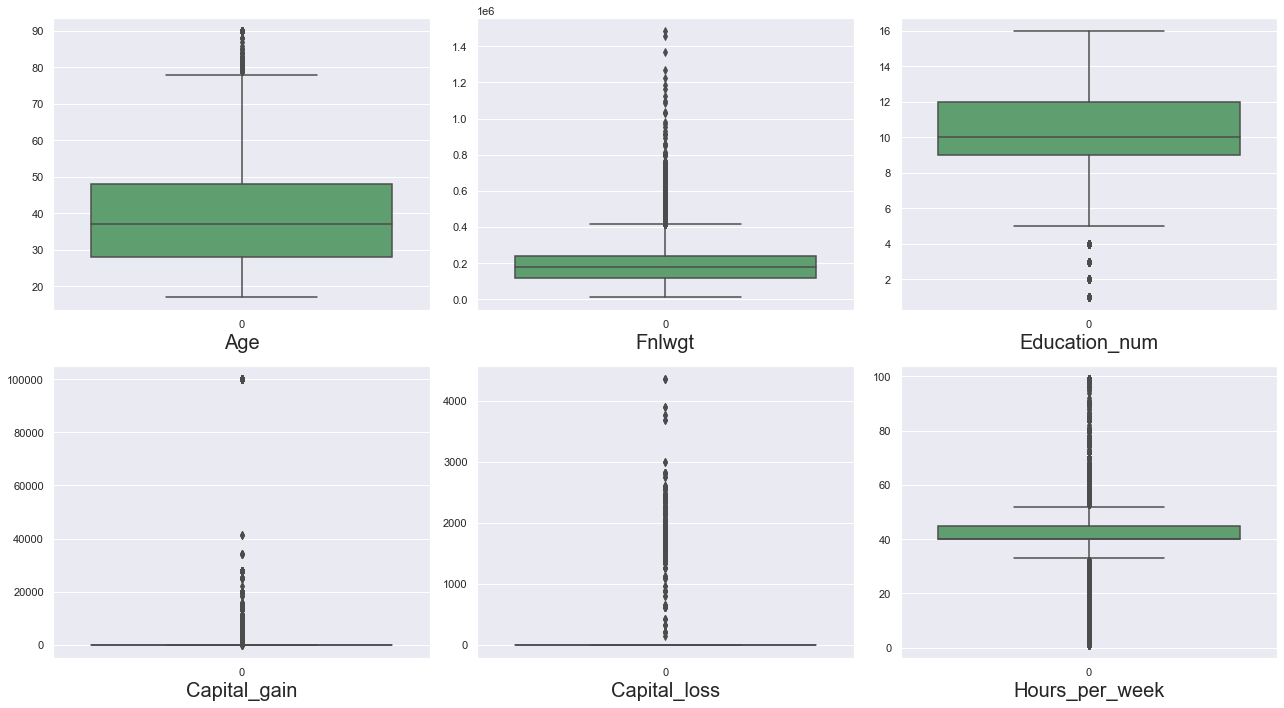

In [53]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

In [54]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [55]:
df.drop(["age_group"], axis=1, inplace=True)


In [56]:
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


### Outliers removal using Zscore method

In [57]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 13)
Shape of the dataframe after removing outliers:  (28061, 13)
Percentage of data loss post outlier removal:  13.753995574133269


##### Data Loss

In [58]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


<b><em> We are losing 13.75 % of data.
    
 Considering we have a lot of rows in our datatset for ML model building.We have option to go for quantile method but by looking at boxplot we can say lower capping will result in useful data loss and eventually data loss will be more than zscore method
 .</em></b>

## 2.  Skewness of features

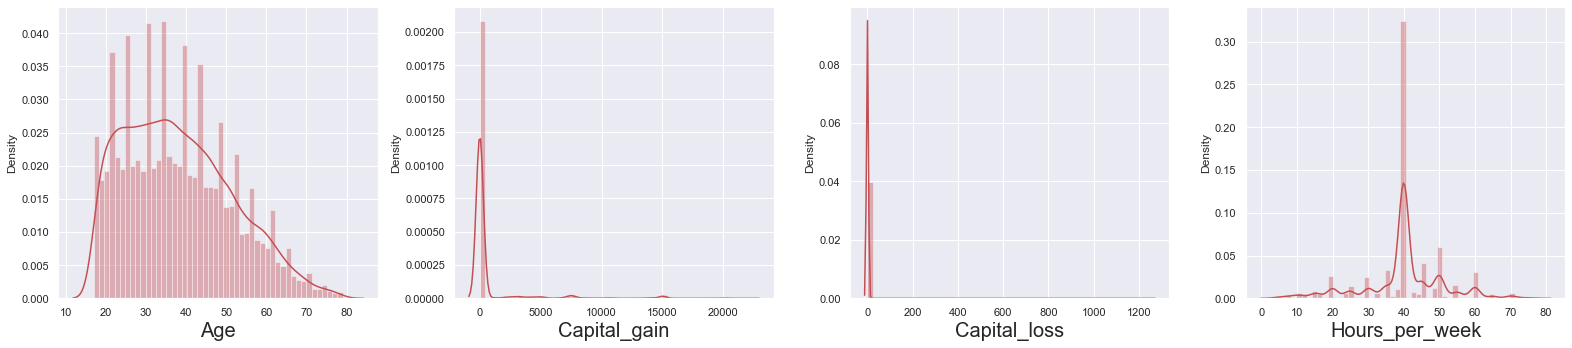

In [59]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [60]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

#### Observation :
- Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
- Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. 
- There is no point in transforming it because at end data will be skewed.

<b> Scaling data is one option to handle skewness in Capital gain and Capital loss.</b>

## 3. Corrleation 

In [61]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


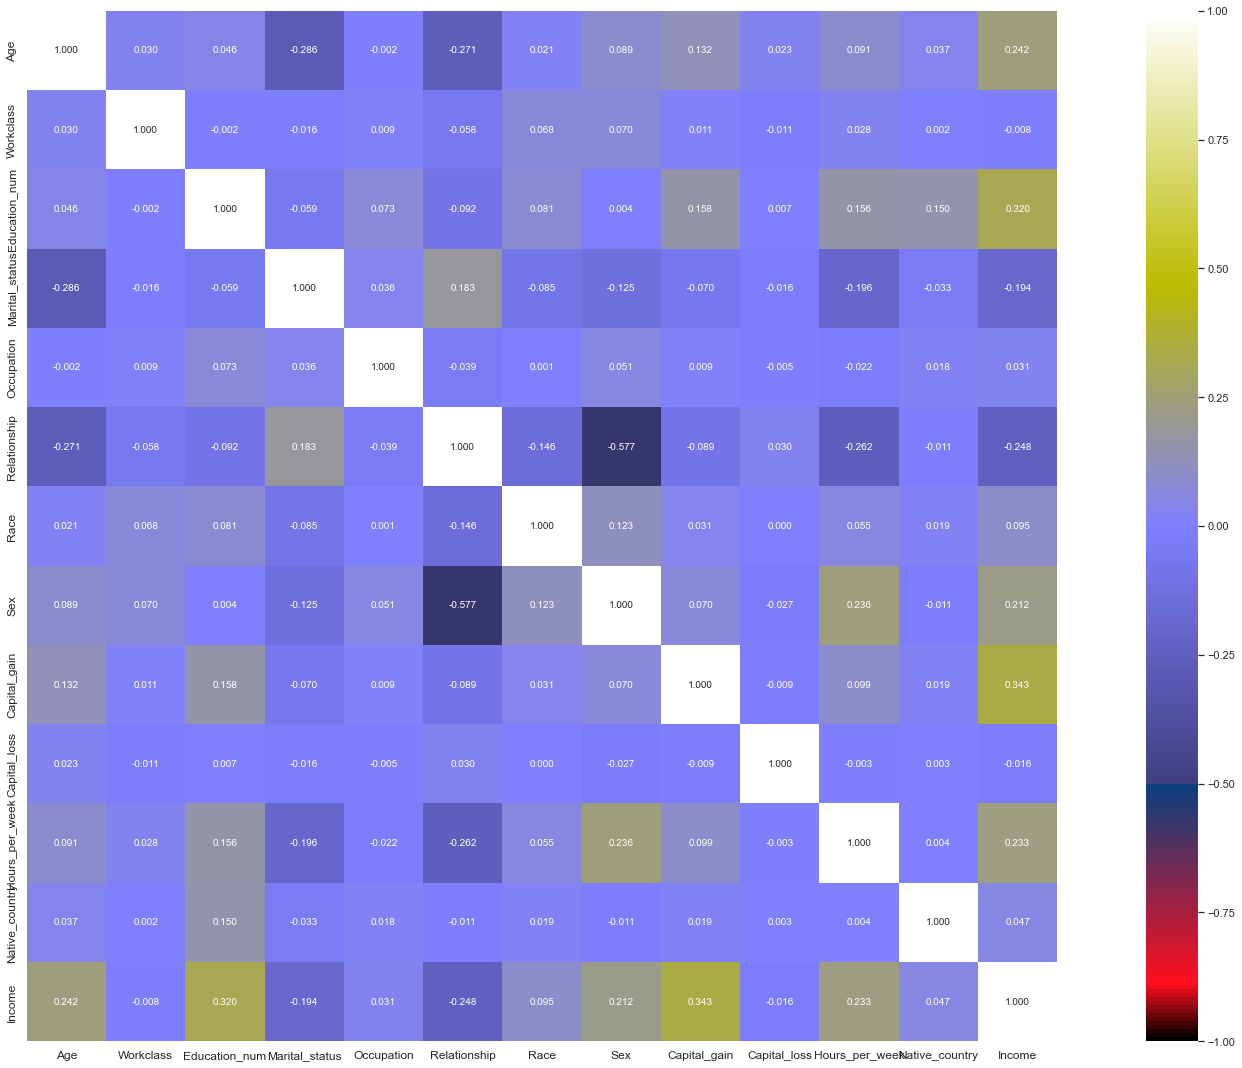

In [62]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

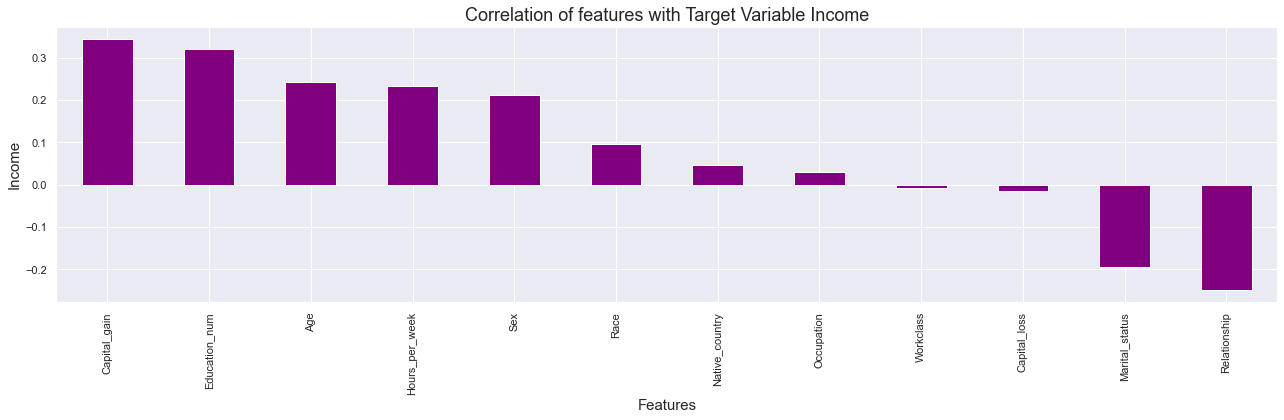

In [63]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

#### Observation:
- Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. <b> After checking Mulitcollinearity, dropping these poorly correlated features or go for PCA. 
    
    As high or low Correlation doesnot mean its causation !!!</b>
- Between input features maximum correlation of -0.557 exist between sex and relationship.
- Capital gain is highly correlated with target variable.

 ## Checking Multicollinearity between features using variance_inflation_factor

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


#### Observation for Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We can remove Independent features with VIF> 10.  </b>


In [65]:
df.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

Target variable data is Imbalanced  & we  need to balance target variable.

### Balancing using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [68]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [69]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

Class imbalanced problem is resolved no and all the categories have same data ensuring that the ML model does not get biased towards one category

## Standard Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

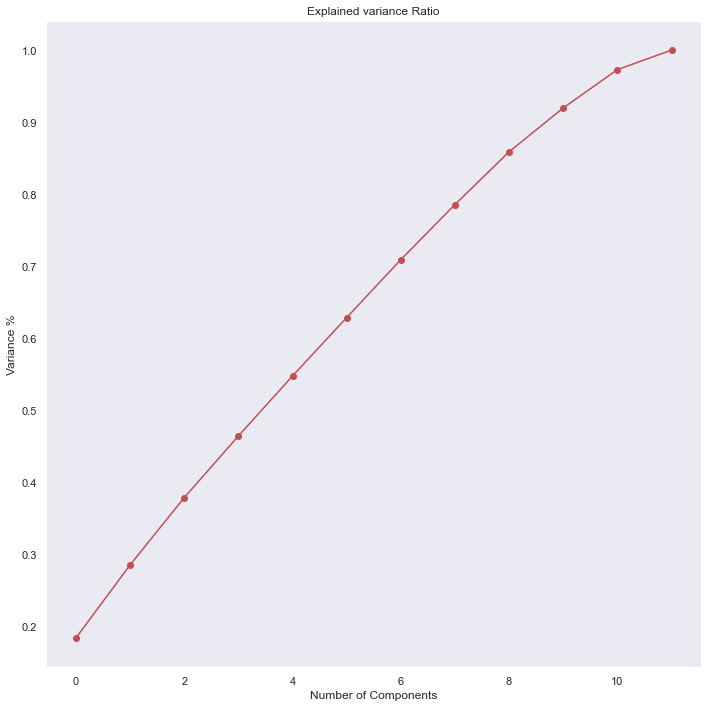

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Observation -
<b>We have 9 principal components attribute with 90% of variation in the data.  
    First 9 components can be used for our prediction. </b>

In [72]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [73]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Model Building

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (34827, 9)
Training target vector size: (34827,)
Test feature matrix size: (8707, 9)
Test target vector size: (8707,)


In [76]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,f1_score

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(principle_x, Y, random_state=i, test_size=.2)    
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
27,303,76.925948,76.926611,0.000663
75,905,76.811095,76.811761,0.000666
20,235,76.799609,76.800276,0.000666
41,431,76.848422,76.846216,0.002207
19,234,76.848422,76.846216,0.002207
...,...,...,...,...
10,115,76.854165,76.938096,0.083931
9,109,76.854165,76.938096,0.083931
4,56,76.756539,76.846216,0.089676
28,327,76.845551,76.754336,0.091215


Observations:

From the above table, as multple random states give same training and testing accuarcy scores, taking one of this from the below code

In [77]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

303

In [78]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(principle_x, Y,test_size=0.2,random_state=BRS)

In [79]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.7692661077294131


In [80]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4399
           1       0.76      0.77      0.77      4308

    accuracy                           0.77      8707
   macro avg       0.77      0.77      0.77      8707
weighted avg       0.77      0.77      0.77      8707



In [81]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[3360 1039]
 [ 970 3338]]


# Cross Validation for Logistic Regression

In [82]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,principle_x, Y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
5,7,76.836510,76.926611,0.000901
8,10,76.822734,76.926611,0.001039
4,6,76.822729,76.926611,0.001039
7,9,76.820449,76.926611,0.001062
1,3,76.820421,76.926611,0.001062
6,8,76.818134,76.926611,0.001085
2,4,76.808949,76.926611,0.001177
0,2,76.797446,76.926611,0.001292
3,5,76.788260,76.926611,0.001384


Observations:

Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=8 from the above table

In [83]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

7

In [84]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,principle_x, Y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 76.8365101006643 
The accuracy score is: 76.9266107729413
Difference is: 0.000901006722770048


# Other Classification Algorithms

In [85]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier


# Defining Voting Classifier Models
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],principle_x, Y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
70.49500401975422
Confusion Matrix:
[[2535 1864]
 [ 705 3603]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.58      0.66      4399
           1       0.66      0.84      0.74      4308

    accuracy                           0.70      8707
   macro avg       0.72      0.71      0.70      8707
weighted avg       0.72      0.70      0.70      8707

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
81.80774089812795
Confusion Matrix:
[[3502  897]
 [ 687 3621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4399
           1       0.80      0.84      0.82      4308

    accuracy                           0.82      8707
   macro avg       0.82      0.82      0.82      8707
weighted avg       0.82      0.82      0.82      8707

---------------------------

,Model,Model Score,Cross Validation Score,Difference
0,LogisticRegression(),76.926611,76.836510,0.000901
3,KNeighborsClassifier(),84.793844,84.451303,0.003425
7,ExtraTreesClassifier(),85.838980,86.222332,0.003834
5,SVC(),82.060411,82.445923,0.003855
9,AdaBoostClassifier(),77.891352,78.279064,0.003877
6,RandomForestClassifier(),85.816010,86.206251,0.003902
11,VotingClassifier(),85.057999,85.462008,0.004040
8,GradientBoostingClassifier(),81.049730,81.458188,0.004085
4,SGDClassifier(),76.363845,76.825024,0.004612
2,Decision Tree Classifier(),81.807741,82.395437,0.005877


## Observations:

Based on the comparison between model score and cross validation scores for multiple models, I have considered **"RandomForestClassifier()"** is the best model due to high model score

I will check with Cross validation score and check for **RandomForestClassifier()**

# CrossValidation :

In [86]:
from sklearn.model_selection import cross_val_score


model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
        VotingClassifier(estimators=estimator,voting="soft")]

for m in model:
    score = cross_val_score(m,principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76134145 0.77029976 0.76524635 0.77340071 0.76912474]
Mean Score : 0.7678826030720469
Std deviation : 0.004185010868167823




Cross Validation Score SVC() :

Score : [0.8141725  0.82324566 0.82462387 0.82324566 0.83586033]
Mean Score : 0.8242296051527784
Std deviation : 0.006906672983528033




Cross Validation Score GaussianNB() :

Score : [0.70449064 0.72125876 0.72585276 0.7181578  0.72696991]
Mean Score : 0.7193459738120089
Std deviation : 0.008077302430724775




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79281038 0.8125646  0.83438613 0.82623177 0.83597519]
Mean Score : 0.8203936137633978
Std deviation : 0.016092159585034082




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.81520616 0.83323762 0.84759389 0.84633054 0.85067769]
Mean Score : 0.8386091806062603
Std deviation : 0.013134295184410357




Cross Validation Score RandomForestClassifier() :

Score : [0.83174457 0.853

## Observations:
    
Based on the comparison between model score and cross validation scores for multiple models, I have considered **"RandomForestClassifier()"** is the best model.

Hyper parameter tuning will be peformed for **RandomForestClassifier()** based on the Cross validation score aswell".

# Hyper Parameter Tuning

In [87]:
# Hyper parameter tuning on RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

parameters = {  'bootstrap': [True], 
             'max_depth': [5,50], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5,10]
            }

In [88]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV

In [89]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 50], 'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10]})

In [90]:
GCV.best_params_   # printing the best parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 10}

In [91]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=RandomForestClassifier(bootstrap=GCV.best_params_['bootstrap'],criterion=GCV.best_params_['criterion'],
                                 max_depth=GCV.best_params_['max_depth'],max_features=GCV.best_params_['max_features'],
                                 n_estimators=GCV.best_params_['n_estimators'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

85.21878947972895
[[3679  720]
 [ 567 3741]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4399
           1       0.84      0.87      0.85      4308

    accuracy                           0.85      8707
   macro avg       0.85      0.85      0.85      8707
weighted avg       0.85      0.85      0.85      8707



In [92]:
score=cross_val_score(ht_model,principle_x, Y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 85.51712442266698 
The accuracy score is: 85.21878947972895
Difference is: -0.0029833494293802776


## Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.0156

Model with default parameters: The difference between Cross Validation Score and model score is 0.016

As difference is almost same with defautl parameters We will consider  **RandomForestClassifier** model with default parameters

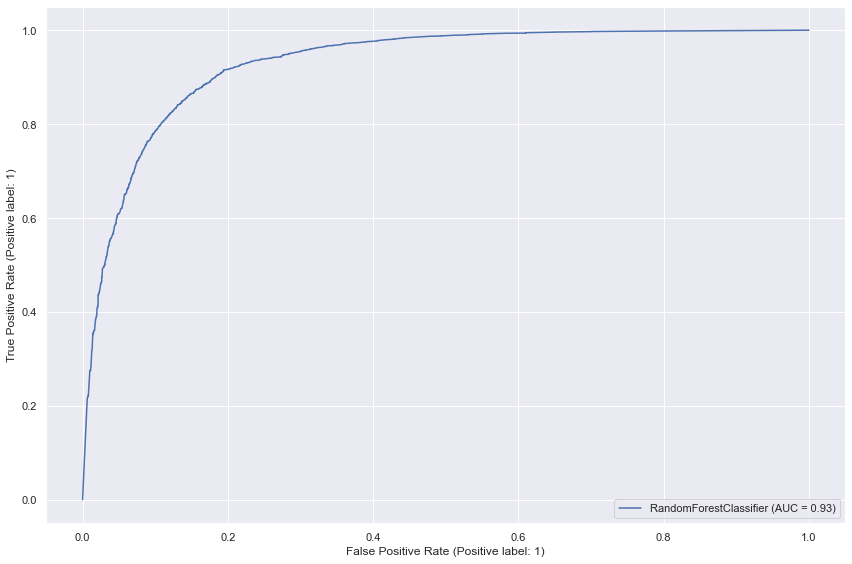

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8584339196276355


In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
Final_model = models[5][1]
disp = plot_roc_curve(Final_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Final Model

In [94]:
#models selected ===RandomForestClassifier()
print("models selected ===",models[5][1])

x_predict = list(Final_model.predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

models selected === RandomForestClassifier()


,0
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,0
9,0


# Saving model


In [95]:
print("Model Saved--", Final_model)
import pickle
file = 'Census_Income_Final'
save = pickle.dump(Final_model,open('Census_Income_Final.pkl','wb'))

Model Saved-- RandomForestClassifier()


# Conclusion-Prediction Census Income

In [96]:
pickled_CensusIncome_predict = pickle.load(open('Census_Income_Final.pkl','rb'))
result=pickled_CensusIncome_predict.score(x_test,y_test)
print(result)

CensusIncome_Predicted=pickled_CensusIncome_predict.predict(x_test)
df_predicted = pd.DataFrame(CensusIncome_Predicted, columns =['CensusIncome_Predicted'])
print("\nCensusIncome Predicted list based on Test data provided: ")
display(df_predicted)

0.8581601010681061

CensusIncome Predicted list based on Test data provided: 


,CensusIncome_Predicted
0,1
1,0
2,1
3,0
4,1
...,...
8702,0
8703,0
8704,1
8705,1
